In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)

In [2]:
# Data Load - 보스턴의 집 값
from sklearn.datasets import load_boston

housing = load_boston()

In [3]:
data, target = housing["data"], housing["target"]

In [4]:
# Data EDA
pd.DataFrame(data, columns=housing["feature_names"]).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
pd.Series(target).describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

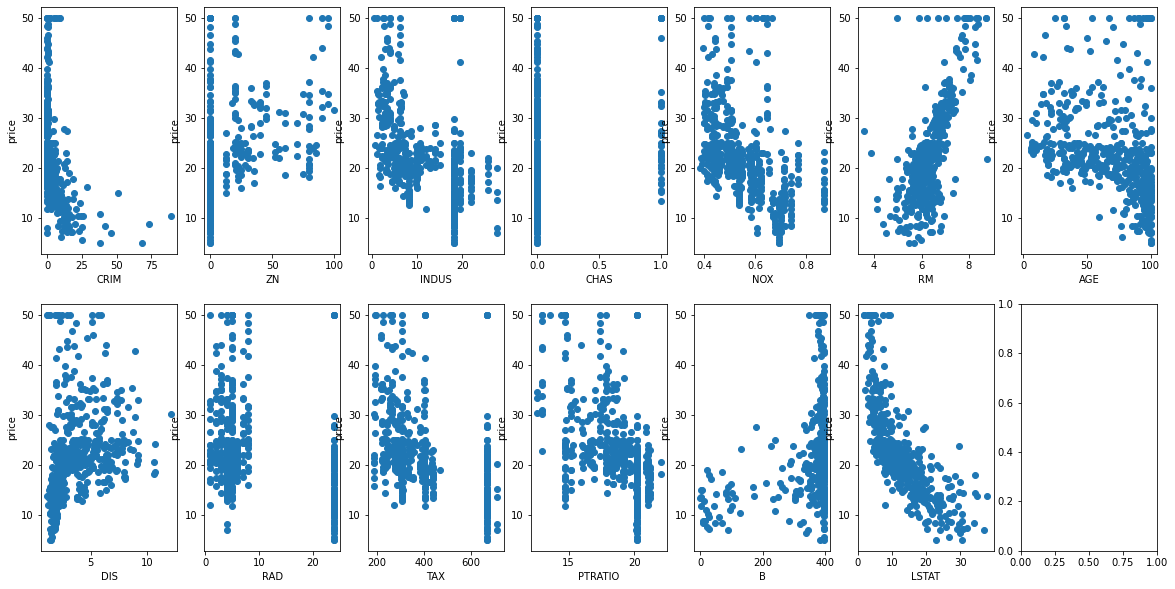

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
for i, feature_name in enumerate(housing["feature_names"]):
    ax = axes[i // 7, i % 7]
    ax.scatter(data[:, i], target)
    ax.set_xlabel(feature_name)
    ax.set_ylabel("price")

In [7]:
# Data Split
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021
)

In [8]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()

In [9]:
# 학습
rf_regressor.fit(train_data, train_target)

RandomForestRegressor()

In [10]:
# 예측
train_pred = rf_regressor.predict(train_data)
test_pred = rf_regressor.predict(test_data)

Text(0, 0.5, 'real')

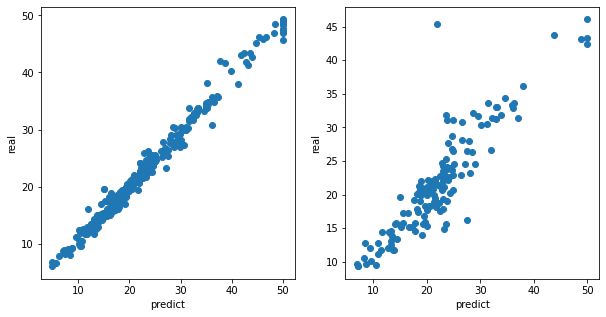

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].scatter(train_target, train_pred)
axes[0].set_xlabel("predict")
axes[0].set_ylabel("real")

axes[1].scatter(test_target, test_pred)
axes[1].set_xlabel("predict")
axes[1].set_ylabel("real")

In [12]:
# 평가
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train_target, train_pred)
test_mse = mean_squared_error(test_target, test_pred)

In [13]:
print(f"train mean squared error is {train_mse:.4f}")
print(f"test mean squared error is {test_mse:.4f}")

train mean squared error is 1.3890
test mean squared error is 12.0446


<AxesSubplot:>

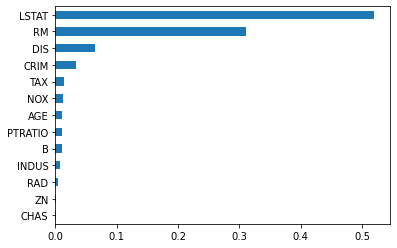

In [14]:
# Feature Importance
feature_importance = pd.Series(rf_regressor.feature_importances_, index=housing["feature_names"])
feature_importance.sort_values(ascending=True).plot(kind="barh")

In [15]:
# Hyper Parameter tuning
from sklearn.model_selection import GridSearchCV

In [16]:
# Grid Search 범위 지정
params = {
    "n_estimators": [100, 200, 500, 1000],
    "criterion": ["mae", "mse"],
    "max_depth": [i for i in range(1, 10, 2)],
}

In [17]:
params

{'n_estimators': [100, 200, 500, 1000],
 'criterion': ['mae', 'mse'],
 'max_depth': [1, 3, 5, 7, 9]}

In [18]:
cv_rf_regressor = RandomForestRegressor()

In [19]:
# 4*2*5*3 = 120개의 모델 탐색
grid = GridSearchCV(estimator=cv_rf_regressor, param_grid=params, cv=3)
grid = grid.fit(train_data, train_target)

In [20]:
print(f"Best score of paramter search is: {grid.best_score_:.4f}")

Best score of paramter search is: 0.8676


In [21]:
grid.best_params_

{'criterion': 'mse', 'max_depth': 9, 'n_estimators': 1000}

In [22]:
print("Best parameter of best score is")
for key, value in grid.best_params_.items():
    print(f"\t {key}: {value}")

Best parameter of best score is
	 criterion: mse
	 max_depth: 9
	 n_estimators: 1000


In [23]:
# 평가
best_rf = grid.best_estimator_

In [24]:
cv_train_pred = best_rf.predict(train_data)
cv_test_pred = best_rf.predict(test_data)

Text(0, 0.5, 'real')

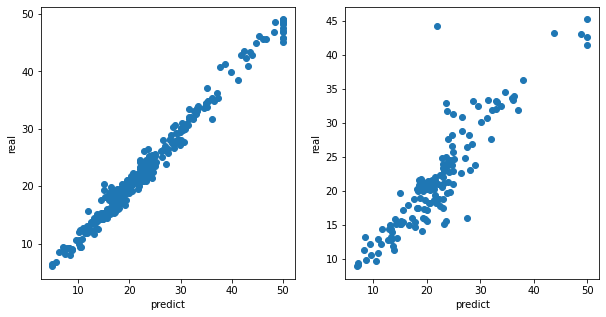

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].scatter(train_target, cv_train_pred)
axes[0].set_xlabel("predict")
axes[0].set_ylabel("real")

axes[1].scatter(test_target, cv_test_pred)
axes[1].set_xlabel("predict")
axes[1].set_ylabel("real")

In [26]:
cv_train_mse = mean_squared_error(train_target, cv_train_pred)
cv_test_mse = mean_squared_error(test_target, cv_test_pred)

In [27]:
print(f"Best model Train mean squared error is {cv_train_mse:.4f}")
print(f"Best model Test mean squared error is {cv_test_mse:.4f}")

Best model Train mean squared error is 1.8391
Best model Test mean squared error is 12.1789


<AxesSubplot:>

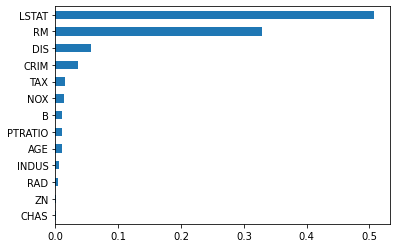

In [28]:
cv_feature_importance = pd.Series(best_rf.feature_importances_, index=housing["feature_names"])
cv_feature_importance.sort_values(ascending=True).plot(kind="barh")

In [29]:
print(f"Test mean squared error is {test_mse:.4f}")
print(f"Best model Test mean squared error is {cv_test_mse:.4f}")

Test mean squared error is 12.0446
Best model Test mean squared error is 12.1789


<AxesSubplot:>

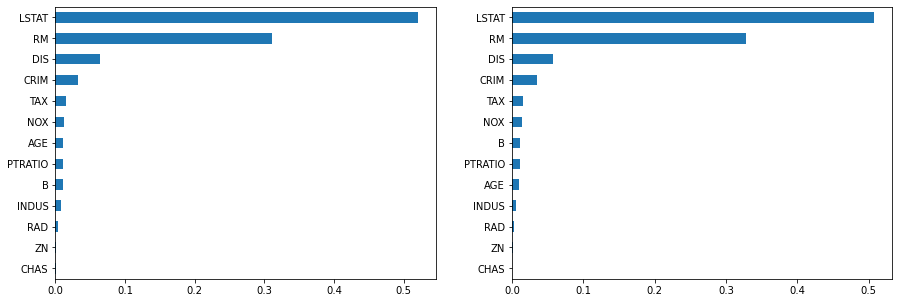

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
feature_importance.sort_values(ascending=True).plot(kind="barh", ax=axes[0])
cv_feature_importance.sort_values(ascending=True).plot(kind="barh", ax=axes[1])